<a href="https://colab.research.google.com/github/coder-penguin/ML/blob/master/tutorial/scikit_learn_tutorial_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sample code for multi classification

Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read data

In [0]:
# read hand-written dataset
mnist = fetch_openml(name='mnist_784')

In [3]:
#784 = 28*28 pixels
mnist['data'].shape

(70000, 784)

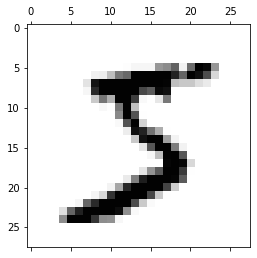

In [4]:
# show data
plt.matshow(mnist['data'][0].reshape(28,28), cmap="Greys")
plt.show()

In [0]:
# image(numpy.ndarray)
X = mnist.data/255

# label(numpy.ndarray)
y = mnist.target

In [0]:
#split dataset to train and test dataset
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True)#default is True

In [7]:
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

56000 14000
56000 14000


###Train model

In [0]:
model = DecisionTreeClassifier()

In [9]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

###Evaluation

k-th cross validation

In [10]:
#k-th cross validation
cv = 3 #the number of foldings
cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

array([0.8610382 , 0.85937751, 0.86167363])

confusion matrix

In [0]:
#calculate confusion matrix
y_train_pred = cross_val_predict(model, X_train, y_train, cv=cv)
conf_mx = confusion_matrix(y_train, y_train_pred)

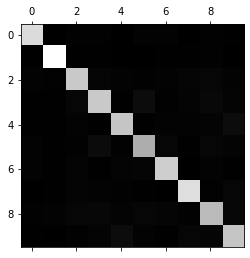

In [12]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

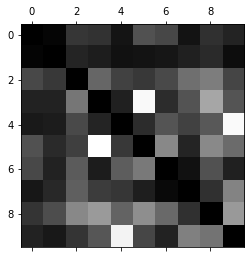

In [13]:
#convert to error probability
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
#set diagonal to 0 for visibility
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

various scores

In [14]:
accuracy_score(y_train, y_train_pred)

0.8595

In [15]:
precision_score(y_train, y_train_pred, average=None)

array([0.91565186, 0.9362069 , 0.84444045, 0.83357016, 0.84988922,
       0.8047619 , 0.8757278 , 0.88864219, 0.81081583, 0.81649266])

In [16]:
recall_score(y_train, y_train_pred, average=None)

array([0.91713004, 0.9530876 , 0.84247312, 0.81773828, 0.85020318,
       0.80332739, 0.87716421, 0.89367915, 0.79197677, 0.83015473])

In [17]:
f1_score(y_train, y_train_pred, average=None)

array([0.91639036, 0.94457184, 0.84345564, 0.82557833, 0.85004617,
       0.80404401, 0.87644542, 0.89115355, 0.80128558, 0.82326702])

In [18]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5575
           1       0.94      0.95      0.94      6267
           2       0.84      0.84      0.84      5580
           3       0.83      0.82      0.83      5739
           4       0.85      0.85      0.85      5414
           5       0.80      0.80      0.80      5049
           6       0.88      0.88      0.88      5487
           7       0.89      0.89      0.89      5822
           8       0.81      0.79      0.80      5509
           9       0.82      0.83      0.82      5558

    accuracy                           0.86     56000
   macro avg       0.86      0.86      0.86     56000
weighted avg       0.86      0.86      0.86     56000



In [0]:
def multiclass_roc_auc_score(y, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y)
    y = lb.transform(y)
    y_pred = lb.transform(y_pred)

    return roc_auc_score(y, y_pred, average=average)

In [20]:
multiclass_roc_auc_score(y_train, y_train_pred)

0.9210486075283185

###Test

In [0]:
y_test_pred = model.predict(X_test)

In [22]:
accuracy_score(y_test, y_test_pred)

0.8728571428571429

###Save

In [0]:
#save the prediction
submissiondir = '.'
submissionname = 'submission'
pd.DataFrame(data={'target':y_test, 'prediction':y_test_pred}).to_csv(submissiondir + '/' + submissionname + ".csv", index_label=["Id"])

In [24]:
# save the model
filename = 'model.sav'
joblib.dump(model, filename)

['model.sav']

In [25]:
# load the model
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8728571428571429
